In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
df = pd.read_csv("income-child.csv")

In [3]:
df.dtypes

Unnamed: 0                        int64
geoid                             int64
year                              int64
in100                             int64
msaid15                           int64
msaname15                        object
countyfips                        int64
statefips                         int64
stateusps                        object
pop                               int64
z_ED_nat                        float64
z_HE_nat                        float64
z_SE_nat                        float64
z_COI_nat                       float64
c5_ED_nat                        object
c5_HE_nat                        object
c5_SE_nat                        object
c5_COI_nat                       object
r_ED_nat                          int64
r_HE_nat                          int64
r_SE_nat                          int64
r_COI_nat                         int64
c5_ED_stt                        object
c5_HE_stt                        object
c5_SE_stt                        object


In [4]:
df

,Unnamed: 0,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,...,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,ID,Region
0,1,36005000200,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1061,...,2015,2015,0,Total,72034,13991.0,"Census Tract 2, Bronx County, NY",14000US36005000200,36005000200,NYC
1,2,36005000400,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1225,...,2015,2015,0,Total,74836,8407.0,"Census Tract 4, Bronx County, NY",14000US36005000400,36005000400,NYC
2,3,36005001600,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1795,...,2015,2015,0,Total,32312,6859.0,"Census Tract 16, Bronx County, NY",14000US36005001600,36005001600,NYC
3,4,36005001900,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,756,...,2015,2015,0,Total,37936,3771.0,"Census Tract 19, Bronx County, NY",14000US36005001900,36005001900,NYC
4,5,36005002000,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,2866,...,2015,2015,0,Total,18086,3694.0,"Census Tract 20, Bronx County, NY",14000US36005002000,36005002000,NYC
5,6,36005002300,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1222,...,2015,2015,0,Total,14479,1901.0,"Census Tract 23, Bronx County, NY",14000US36005002300,36005002300,NYC
6,7,36005002500,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1784,...,2015,2015,0,Total,17226,6097.0,"Census Tract 25, Bronx County, NY",14000US36005002500,36005002500,NYC
7,8,36005002701,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1079,...,2015,2015,0,Total,20153,5229.0,"Census Tract 27.01, Bronx County, NY",14000US36005002701,36005002701,NYC
8,9,36005002702,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1492,...,2015,2015,0,Total,17147,7165.0,"Census Tract 27.02, Bronx County, NY",14000US36005002702,36005002702,NYC
9,10,36005002800,2015,1,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36005,36,NY,1025,...,2015,2015,0,Total,49529,5441.0,"Census Tract 28, Bronx County, NY",14000US36005002800,36005002800,NYC


In [5]:
df_income_child = df[['ID','r_COI_stt','r_COI_nat','Household Income by Race','Region']]

In [6]:
df_income_child

,ID,r_COI_stt,r_COI_nat,Household Income by Race,Region
0,36005000200,26,20,72034,NYC
1,36005000400,33,28,74836,NYC
2,36005001600,16,9,32312,NYC
3,36005001900,16,10,37936,NYC
4,36005002000,2,1,18086,NYC
5,36005002300,1,1,14479,NYC
6,36005002500,4,2,17226,NYC
7,36005002701,5,3,20153,NYC
8,36005002702,2,1,17147,NYC
9,36005002800,16,9,49529,NYC


## Plot the resulting DF using regplot in seaborn
for x use 'r_all_rs_third'
for y use 'r_all_rs_fourth'

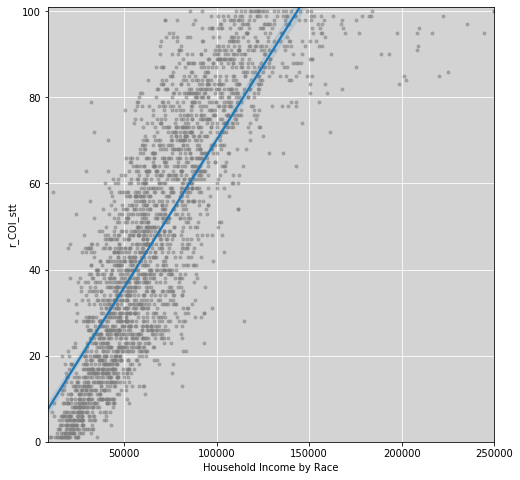

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(9000, 250001)
ax.set_ylim(0, 101)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns_plot = sns.regplot('Household Income by Race','r_COI_stt',
#             ci = None,
            data=df_income_child,
            marker='.', 
            scatter_kws={"color": "grey", 'alpha': 0.5},
#             line_kws={'color':'red', 'linewidth':2}
                      )
sns_plot.figure.savefig("income-child.svg")

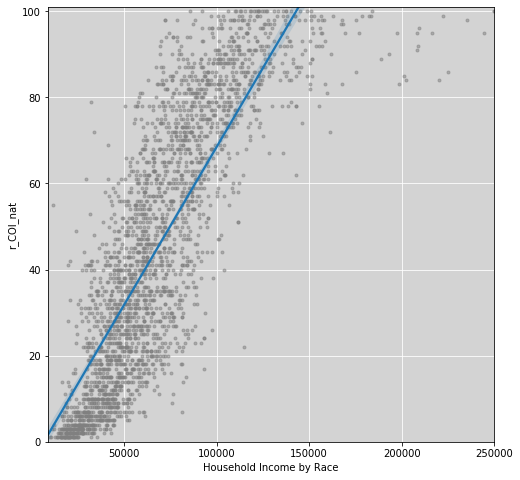

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(9000, 250001)
ax.set_ylim(0, 101)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns_plot = sns.regplot('Household Income by Race','r_COI_nat',
#             ci = None,
            data=df_income_child,
            marker='.', 
            scatter_kws={"color": "grey", 'alpha': 0.5},
#             line_kws={'color':'red', 'linewidth':2}
                      )
sns_plot.figure.savefig("income-child-national.svg")

In [9]:
df_LI = pd.read_csv("income-child-LI.csv")
df_nyc = pd.read_csv("income-child-nyc.csv")

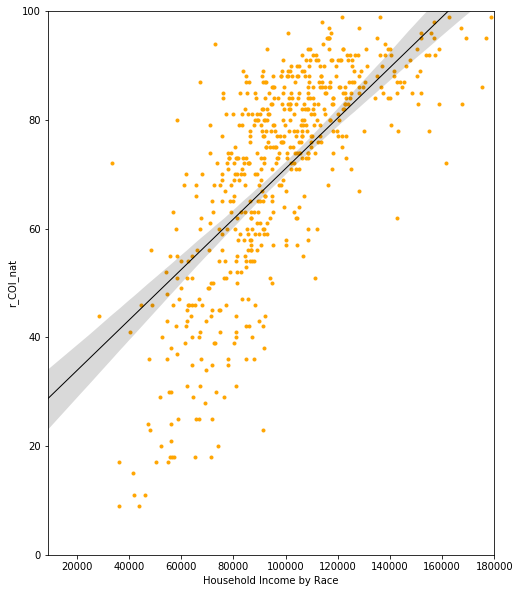

In [18]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(9000, 180000)
ax.set_ylim(0, 100)
# ax.set_facecolor('lightgrey')
# ax.grid(True, color='black')
ax.set_axisbelow(True)

sns_plot = sns.regplot('Household Income by Race','r_COI_nat',
#             ci = None,
            data=df_LI,
            marker='.', 
            scatter_kws={"color": "orange", 'alpha': 1},
            line_kws={'color':'black', 'linewidth':1}
                      )
sns_plot.figure.savefig("income-child-LI-01.svg")

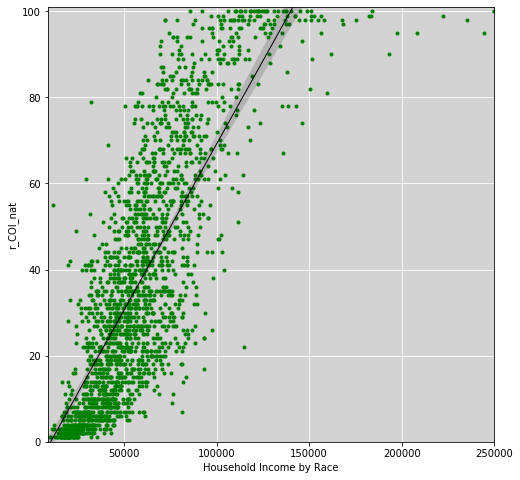

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(9000, 250001)
ax.set_ylim(0, 101)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns_plot = sns.regplot('Household Income by Race','r_COI_nat',
#             ci = None,
            data=df_nyc,
            marker='.', 
            scatter_kws={"color": "green", 'alpha': 1},
            line_kws={'color':'black', 'linewidth':1}
                      )
sns_plot.figure.savefig("income-child-nyc.svg")